In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from data_library import *
from map_library import *
from algorithm import *

In [2]:
lost_era = 20
alone_era = 35
social_era = 42
iterations = 50

B,E, F, P_tot, R_list = multi_algorithme_essaim(Nb,10,iterations,lost_era,alone_era,social_era)

100%|██████████| 50/50 [00:15<00:00,  3.17it/s]


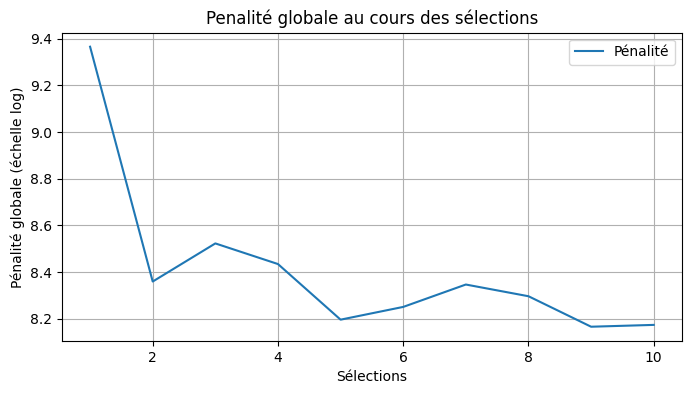

In [3]:
# Evolution de la pénalité au cours des splits

logP = np.log10(np.array([P_tot[i][-1] for i in range(10)]))
x = np.array(range(1,11))

plt.figure(figsize=(8,4))
plt.plot(x,logP,label='Pénalité')
plt.title("Penalité globale au cours des sélections")
plt.xlabel("Sélections")
plt.ylabel("Pénalité globale (échelle log)")
plt.grid()
plt.legend()
plt.show()


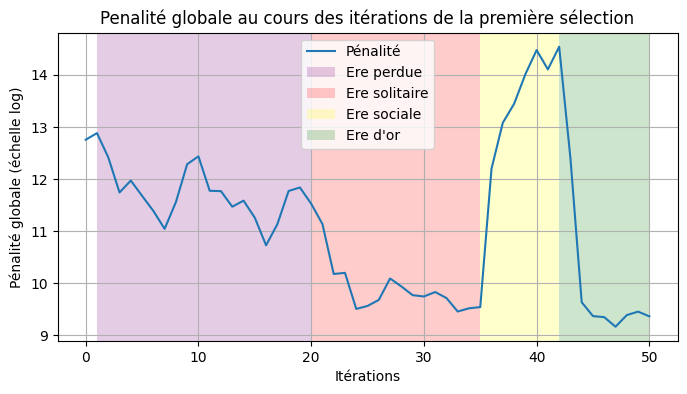

In [4]:
# Evolution de la pénalité au cours des itérations pour un split choisi

logP = np.log10(np.array(P_tot[0]))
x = np.array(range(iterations + 1))

plt.figure(figsize=(8,4))
plt.plot(x,logP,label='Pénalité')
plt.title("Penalité globale au cours des itérations de la première sélection")
plt.xlabel("Itérations")
plt.ylabel("Pénalité globale (échelle log)")
plt.axvspan(1, lost_era, facecolor='purple', alpha=0.2, label='Ere perdue')
plt.axvspan(lost_era, alone_era, facecolor='red', alpha=0.2, label='Ere solitaire')
plt.axvspan(alone_era, social_era, facecolor='yellow', alpha=0.2, label='Ere sociale')
plt.axvspan(social_era, iterations, facecolor='green', alpha=0.2, label="Ere d'or")
plt.grid()
plt.legend()
plt.show()


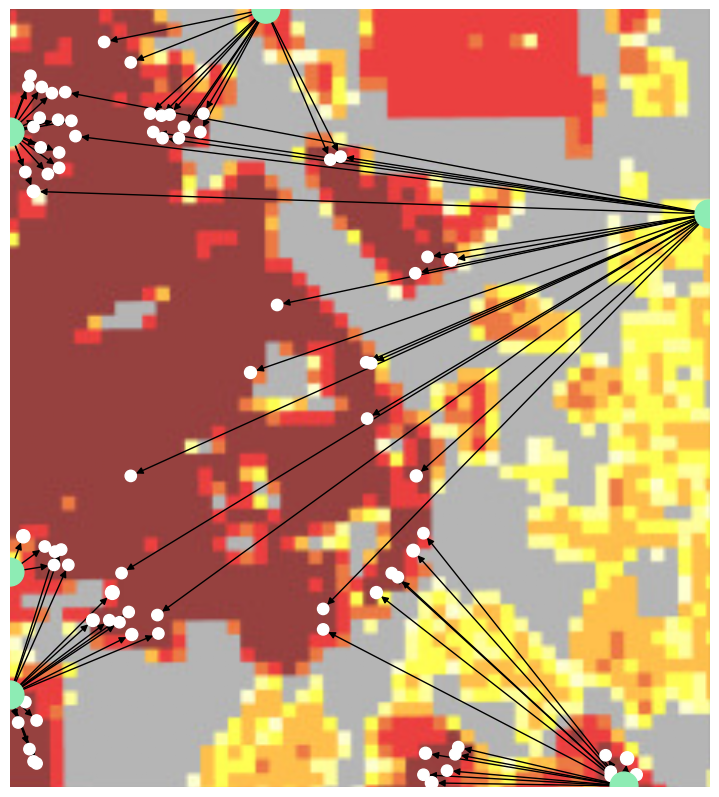

In [6]:
# Tracé du graphique

G = nx.DiGraph()
pos = {}
colors = {}
size = {}
for i, f in enumerate(F):
    id = f"f{i}"
    #G.add_node(id, use=f'{f.Nft}')
    colors[id] = '#8DECB4'
    pos[id] = (f.y, -f.x)
    size[id] = 400
for i, b in enumerate(B):
    id = f"b{i}"
    G.add_node(id)
    colors[id] = 'white'
    pos[id] = (b.y,-b.x)
    size[id] = R_list[i]
for e in E:
    G.add_edge(f"f{e.f_id}",f"b{e.b_id}")
plt.figure(figsize=(7,8))
nx.draw(G,pos,node_color=[colors[node] for node in G.nodes()],node_size=[size[node] for node in G.nodes()], arrowsize=10)
use = nx.get_node_attributes(G, 'use')
#nx.draw_networkx_labels(G, pos, labels=use)
img = plt.imread("Density_map/Kano_density.png")  # Remplacez "background_image.png" par le chemin de votre image
plt.imshow(img, extent=[0,width,-length,0])  # Ajustez les limites et l'opacité selon vos besoins
plt.show()

In [11]:
# Calcul de la distance totale

d_tot = 0

for e in E:
    d_tot += e.d

d_tot *= scale

In [12]:
d_tot

305763.7838198825